<a href="https://colab.research.google.com/github/ppuentex/ML_project/blob/main/LSTM_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Patricia Puente 
#### Title: Is it possible to predict annual streamflow using climate indices with a machine learning model? 
#### ECE 523 

Import packages and data necessary. 

In [9]:
#packages needed 
import numpy as np 
import pandas as pd  #dataframe 
from sklearn.preprocessing import StandardScaler #normalize data set 
import matplotlib.pyplot as plt #plots 

#grab data from Github 
SF_url = "https://raw.githubusercontent.com/ppuentex/ML_project/main/data/MultiObserved_data.csv"
ENSO_url = "https://raw.githubusercontent.com/ppuentex/ML_project/main/data/nino3_4_monthly_record.csv"
PMDI_url = "https://raw.githubusercontent.com/ppuentex/ML_project/main/data/UCR_basinAvg_PMDI_0to2017.csv"
#import data needed 
ENSO = pd.read_csv(ENSO_url, header=None)
PMDI = pd.read_csv(PMDI_url)
SF = pd.read_csv(SF_url)


Manipulate data to be in the form that is necesary. \
For ENSO data, this is in the form of monthly values so we neeed to take the average for each year to get the annual value.\
For SF data, this is a data set with other observed streamflow locations and need to convert from acre feet to million acre feet. 

In [10]:
#calculate the average of each row b/c original is monthly data and we need annual
ENSO['Mean'] = ENSO.iloc[:, 1:12].mean(axis=1)
#grabbing data from dates 1906 to 2017 which is the period of record
ENSO_data = ENSO.iloc[36:148, [0,13]]
ENSO_data = ENSO_data.reset_index(drop=True) #reset the index for concatinating 
ENSO_data.columns = ["Year", "ENSO"] #rename columns 
#grabbing data from dates 1906 to 2017 which is the period of record
PMDI_data = PMDI.iloc[1906:2018,[0,1]]
PMDI_data = PMDI_data.reset_index(drop=True)
PMDI_data.columns = ['Year', 'PMDI']
#grabbling only the first two columns for year and location of Lees Ferry gage 
SF_data = SF.iloc[0:112,[0,1]]
SF_data.columns = ["Year", "Streamflow"]
#put values of streamflow in Million Acre Feet (MAF) by dividing by 1e6
SF_data.iloc[:,1] = SF_data.iloc[:,1].div(1e6)

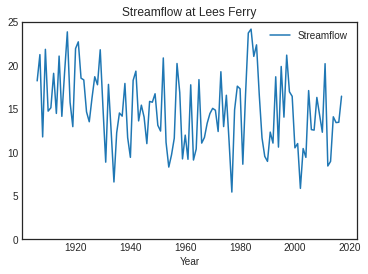

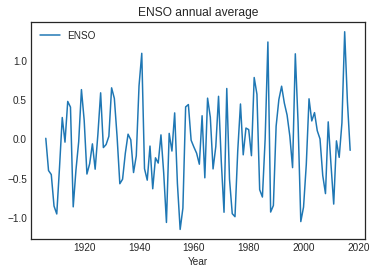

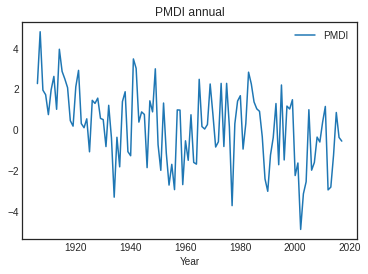

In [11]:
plt.style.use('seaborn-white')
SF_data.plot('Year', 'Streamflow', title = "Streamflow at Lees Ferry", ylim = (0,25))
plt.show()
ENSO_data.plot('Year','ENSO', title = "ENSO annual average")
plt.show()
PMDI_data.plot('Year','PMDI', title = "PMDI annual")
plt.show()

Is PMDI and ENSO related to Streamflow?\
Use scatterplots to see this. 

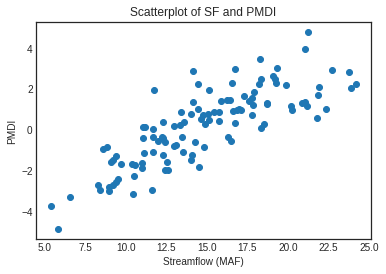

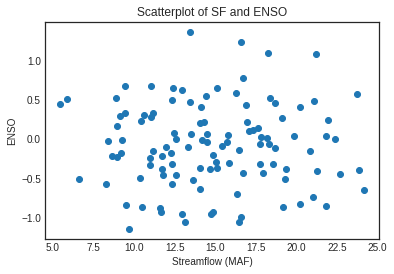

In [12]:
plt.scatter(SF_data["Streamflow"], PMDI_data["PMDI"])
plt.xlabel("Streamflow (MAF)")
plt.ylabel("PMDI")
plt.title("Scatterplot of SF and PMDI")
plt.show()

plt.scatter(SF_data["Streamflow"], ENSO_data["ENSO"])
plt.xlabel("Streamflow (MAF)")
plt.ylabel("ENSO")
plt.title("Scatterplot of SF and ENSO")
plt.show()

Put the data in dataframe in order to start training and testing for LSTM model. 

In [13]:
data = [SF_data["Year"], SF_data["Streamflow"], ENSO_data["ENSO"], PMDI_data["PMDI"]]
header = ["Year", "Streamflow", "ENSO", "PMDI"]
df=pd.concat(data, axis=1,keys=header)

In [20]:
#separate the years 
train_years = df["Year"]
#variables for training 
cols = list(df)[1:4] #grab column names 
df_training = df[cols].astype(float) #for normalization 

#For an LSTM network, we use signmoid so we need to normalize the dataset 
scaler = StandardScaler()
scaler = scaler.fit(df_training)
df_training_scaled = scaler.transform(df_training)